In [5]:
import matplotlib.pyplot as plt
import pickle
import glob
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
model_dirs = glob.glob('/home/bartoldson1/surrogates4sims/tb/*')
def build_result_df(aggregator):
    result = pd.read_pickle(model_dirs[0]+'/results.p')
    result['window'] = int(model_dirs[0].split('_')[5][1:])
    result['latentDim'] = int(model_dirs[0].split('_')[6][9:])
    result['svd_rel_err'] = aggregator(result['svd_rel_err'])
    result['LIN_z_mean_rel_error'] = aggregator(result['LIN_z_mean_rel_error'])
    result['lin_rel_err'] = aggregator(result['lin_rel_err'])
    results = pd.DataFrame(result,index=[0])
    for i, m in enumerate(model_dirs[1:],1):
        result = pd.read_pickle(m+'/results.p')
        result['window'] = int(m.split('_')[5][1:])
        result['latentDim'] = int(m.split('_')[6][9:])
        result['svd_rel_err'] = aggregator(result['svd_rel_err'])
        result['LIN_z_mean_rel_error'] = aggregator(result['LIN_z_mean_rel_error'])
        result['lin_rel_err'] = aggregator(result['lin_rel_err'])
        results=results.append(pd.DataFrame(result, index=[i]))
    return results
results = build_result_df(np.mean)
results

,LIN_z_mean_rel_error,svd_rel_err,lin_rel_err,window,latentDim
0,1.425343,0.477671,1.266604,1,8
1,1.607939,0.386641,1.366756,1,16
2,1.802175,0.314556,1.585935,1,32
3,2.377189,0.247330,2.119684,1,64
4,0.753809,0.477671,0.783792,10,8
5,1.307000,0.386641,1.276059,10,16
6,1.776670,0.314556,2.428062,10,32
7,1.801272,0.247330,1.846350,10,64
8,0.485781,0.477671,0.868410,20,8
9,0.506802,0.386641,0.820984,20,16


In [63]:
results.groupby('window').mean()

,LIN_z_mean_rel_error,svd_rel_err,lin_rel_err,latentDim
window,,,,
1,1.803161,0.35655,1.584745,30
10,1.409688,0.35655,1.583566,30
20,0.743624,0.35655,1.005936,30
30,0.553815,0.35655,0.867279,30
50,0.569046,0.35655,0.876348,30
100,0.599617,0.35655,0.868507,30
150,0.550384,0.35655,0.857614,30


In [64]:
results.groupby('latentDim').mean()

,LIN_z_mean_rel_error,svd_rel_err,lin_rel_err,window
latentDim,,,,
8,0.640588,0.477671,0.884641,51.571429
16,0.792108,0.386641,0.987749,51.571429
32,0.990024,0.314556,1.217386,51.571429
64,1.136900,0.247330,1.278221,51.571429


In [65]:
results.pivot('window','latentDim','lin_rel_err')

latentDim,8,16,32,64
window,,,,
1,1.266604,1.366756,1.585935,2.119684
10,0.783792,1.276059,2.428062,1.846350
20,0.868410,0.820984,1.020129,1.314220
30,0.799294,0.888853,0.816322,0.964647
50,0.841099,0.872193,0.907698,0.884401
100,0.817085,0.852871,0.880407,0.923665
150,0.816200,0.836525,0.883148,0.894582


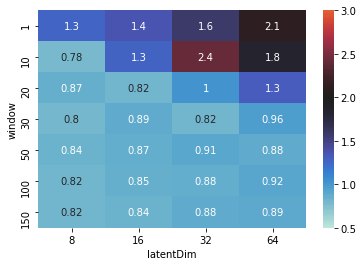

In [71]:
sns.heatmap(results.pivot('window','latentDim','lin_rel_err'),annot=True,center=2, vmin=0.5, vmax=3)
plt.show()

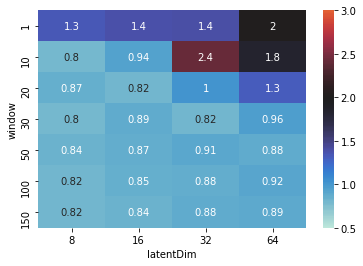

In [72]:
sns.heatmap(build_result_df(np.median).pivot('window','latentDim','lin_rel_err'),annot=True,center=2, 
            vmin=0.5, vmax=3)
plt.show()

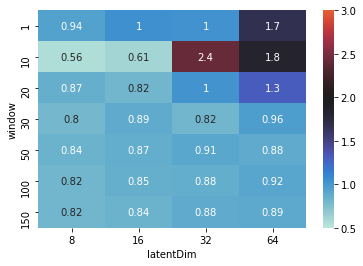

In [73]:
sns.heatmap(build_result_df(np.min).pivot('window','latentDim','lin_rel_err'),annot=True,center=2, 
            vmin=0.5, vmax=3)
plt.show()

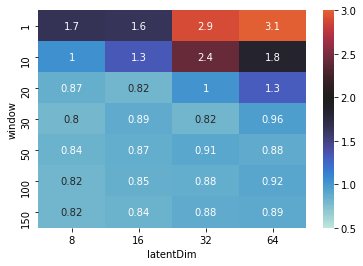

In [74]:
sns.heatmap(build_result_df(np.max).pivot('window','latentDim','lin_rel_err'),annot=True,center=2, vmin=0.5, vmax=3)
plt.show()